In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() { if (code_show){ $('div.input').hide(); } else { $('div.input').show(); } code_show = !code_show } 
$( document ).ready(code_toggle);
</script>

Raw code hidden. To show code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
import string 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ipywidgets import widgets , interact 
from pycipher import Caesar
from IPython.display import display, Markdown

In [3]:
# Function: Counts occurences of letters in a string
# Input: text_string : string
# Output: text_dict : dictionary

# Notes: 
    # Ignores special symbols and numbers.
    # Counts upper and lower case as the same.
    # Output key representation is upper case.

def text_dict(text_string):
    
    text_dict = {}    
    text_string = text_string.upper()
    alphabet_string = string.ascii_uppercase
    
    # Iterate through every character in the text string, if it's a character, check if it's already in the 
    # dictionary, if it is, increment its count by one. Otherwise, start its count by one.

    for character in text_string:
        
        if character in alphabet_string:
                if character in text_dict:
                    text_dict[character] = text_dict[character] + 1
                else:
                    text_dict[character] = 1

    return text_dict

# Function: Gets frequency of letters in an alphabet dictionary.
# Input: text_dict : dictionary 
# Output: freq_dict : dictionary

def find_freq(text_dict):
    
    total_character_count = 0
    freq_dict = {}
    
    for character in text_dict:
        total_character_count += text_dict[character]

    for character in text_dict:
        freq_dict[character] =  text_dict[character]/total_character_count
        
    return freq_dict

# Function: Displays bar plot.
# Input: title_string : string , input_dict : dictionary , bar_color : string 

def display_bar_plot(title_string,input_dict,bar_color):
    
    plt.figure( figsize=(17,5) )
    bars = plt.bar( range(len(input_dict)) , list(input_dict.values()) , align='center' , color=bar_color , alpha=1, edgecolor='black', hatch='//')
    plt.xticks( range(len(input_dict)) , list(input_dict.keys()) )
    plt.xlabel('Letters', fontsize = 15)
    plt.ylabel('Frequency', fontsize = 15)
    plt.title(title_string, fontsize = 17)
    plt.show()
    
# Function: Converts decimal representation to percentange of frequencies in a dictionary.
# Input: freq_dict : dictionary
# Output: freq_dict : dictionary 

def freq_as_percent(freq_dict):
    
    for key,value in freq_dict.items():
        freq_dict[key] = '%.2f'%round(english_freq[key]*100,2)
        
    return freq_dict

# Function: Orders dictionary by key.
# Input: input_dict : dictionary
# Output: output_dict : dictionary
    
def order_dict(input_dict):
    
    series = pd.Series(input_dict)
    order_series = series.sort_values(axis=0,ascending=False)
    output_dict = order_series.to_dict()
    
    return output_dict

# Function: Plots a stacked barplot based on two alphabet dictionaries.
# Input: title_string : string , input_dict_1 : dictionary, input_dict_2 : dictionary
#        bar_color_1 : string, bar_color_2 : string

def stacked_barplots(title_string,input_dict_1,input_dict_2,bar_color_1,bar_color_2):

    plt.figure( figsize=(17,5) )
    
    english_bars = plt.bar( range(len(input_dict_1)) , list(input_dict_1.values()) , align='center' , color=bar_color_1 , alpha=1, edgecolor='black', hatch='//')
    encrypted_bars = plt.bar( range(len(input_dict_2)) , list(input_dict_2.values()) , align='center' , color=bar_color_2 , alpha=1, edgecolor='black', hatch='//')
    
    plt.xticks( range(len(input_dict_1)) , list(input_dict_1.keys()) )
    plt.xlabel('Letters', fontsize = 15)
    plt.ylabel('Frequency', fontsize = 15)
    plt.title(title_string, fontsize = 17)
    plt.legend( ('Usual English','Text Encrypted by Substitution Cipher') , fontsize = 15)
    plt.show()
    
# Function: Count the total number of occurence of every letter in a dictionary and take their sum.
# Input: input_dict : dictionary
# Output: total_count : integer

def count_letters(input_dict):
    
    total_count = 0 
    
    for element in input_dict:
        total_count += input_dict[element]
        
    return total_count

# Function: Display the letter count as a table (well, a dataframe..)
# Input: letter_dict : dictionary , row_title : string

def display_letter_count(letter_dict,row_title):
    
    output_dataframe = pd.DataFrame([letter_dict])
    output_dataframe.index = [row_title]
    pd.set_option('display.max_columns',26)
    display(output_dataframe)
    
# Function: For letters in the alphabet but not in the dictionary, give such letters a count of zero.
# Input: input_dict : dictionary
# Output: output_dict : dictionary 
# Notes:
    # The purpose of this is to keep the lengths of dictionaries the same, so when the double bar plot function
    # is called, we don't run into issues of having different dictionary lengths. 
    
def fill_zeroes(input_dict):
    
    for letter in list(string.ascii_uppercase):
    
        if(letter not in input_dict):
            
            input_dict[letter] = 0
        
    return input_dict

# Function: Plot two bars for every letter, one next to the other.
# Input: dict_1 : dictionary , dict_2 : dictionary

def double_bars_plot(dict_1,dict_2):

    labels = list(string.ascii_uppercase)

    N = len(english_freq)

    X = np.arange(len(dict_1))
    bar_width = 0.425

    fig = plt.figure( figsize=(17,5) )

    ax = plt.subplot(111)
    ax.bar( (X) , dict_1.values(), bar_width, color='blue', align='center', hatch='//')
    ax.bar( (X-bar_width) , dict_2.values(), bar_width, color='green', align='center', hatch='//')
    ax.legend(('Usual English','Your Text'), fontsize = 15)

    plt.xticks(X-(bar_width/2), dict_1.keys())
    plt.xlabel('Character', fontsize = 15)
    plt.ylabel('Frequency', fontsize = 15)
    plt.title("Frequency Analysis", fontsize = 17)
    plt.show()
    
# Dictionary for usual frequencies of characters in English. Source: from Wikipedia

english_freq = {'A':0.08167,'B':0.01492,'C':0.02782,'D':0.04253,'E':0.12702,'F':0.02228,'G':0.02015,'H':0.06094,
                'I':0.06966,'J':0.00153,'K':0.00772,'L':0.04025,'M':0.02406,'N':0.06749,'O':0.07507,'P':0.01929,
                'Q':0.00095,'R':0.05987,'S':0.06327,'T':0.09056,'U':0.02758,'V':0.00978,'W':0.02360,'X':0.00150,
                'Y':0.01974,'Z':0.00074}

# Widget Functions & Packages

import ipywidgets as w
from ipywidgets import Button , Layout , interact
from IPython.display import Javascript, display

# Create a text box for user to input text

get_user_text = w.Textarea( value='', placeholder='Enter your text here.', description='', disabled=False , layout=Layout(width='100%', height='250px') )

# Create a slider to obtain shift integer from user 

get_user_shift = w.IntSlider( value=7, min=1, max=26, step=1, description='Ceasar Shift:', disabled=False, continuous_update=False, orientation='horizontal', readout=True, readout_format='d')

# Function: After clicking on a button prompt, the next cell is executed.

def rerun_cell(ev):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+2)'))
    button_t = w.Button(button_style='info',description="Restart")

# Other Functions & Packages

from pycipher import Caesar
import collections

def encrypt(shift,message):
    
    return Caesar(shift).encipher(message)

# Ceasar Cipher 

def ceasar_cipher_map_display(shift):
    
    # Alphabet list, unshifted numeric list, shifted numeric list.
    
    alphabet_list = list(string.ascii_lowercase)
    unshifted_alphabet = list( range(1,27) ) 
    shifted_alphabet = list( map(lambda x:  (x + shift) % 26, unshifted_alphabet) )
    
    # Occurences of 0 are replaced by 26 after shifting to simplify demonstration.
    
    zero_index = shifted_alphabet.index(0)
    shifted_alphabet[zero_index] = 26
    
    print("Plaintext     Ciphertext")

    for i in range(0,26):

        alphabet_maps = " "*3 + str(alphabet_list[i]) + " "*6 +  " → " + " "*6 + alphabet_list[ shifted_alphabet[i-1] % 26 ]
        
        print( alphabet_maps )
    
def ceasar_cipher_map_display_ui(Shift):
    
    ceasar_cipher_map_display(Shift)

<h1 align='center'>Introduction to Basic Cryptography</h1>

### What Is Cryptography?

Cryptography is the application and study of methods for secure communications in the presence of third parties (called adversaries). That is, how can we communicate messages in a confidential manner in such a way that only our intended readers can view the message?

The process of converting an ordinary message (called the _plain text_) into one that cannot be read (called the _cipher text_) is **encryption**. The reverse process of figuring out the plaintext message in a cipher text is called **decryption**. An important note to make here is that the process of encryption should not only assemble the plain text into a cipher text, but also handle the reverse. If this was not so, then such a method of encryption would not be of much use as our intended reader would not be able to read the message! 

Cryptography concerns itself with a process by which an encrypted message is made non-readable, but is readable for the intended reader who decrypts it. But in the real world, there are always adversaries trying to decrypt messages not intended for them. This drives the progress in both the improvement of encryption and decryption techniques, as those willing to secure their messages find methods of better encryption and at the same time find methods of decryption to seek the weaknesses of current encryption methods today.

Historically, cryptography was based on this concept of message confidentiality. Encryption attempted to secure the secrecy of communications for spies, military leaders, and diplomats. But its modern usage has grown to encompass more than just the encryption of simple messages. We now use it for identity authentication, digital signatures, secure computation, banking, and the processing of online payment transactions.

---

<h2 align='center'>Modular Arithmetic</h2>

### What Is Modular Arithmetic?

Modular arithmetic is a system of arithmetic for integers. The main idea is that numbers "wrap around" once a certain value, called the **modulus** is reached. 

Some familiar use of modular arithmetic is the 12-hour clock. Usual addition suggests that if it is 10:00 now, then 5 hours later it would be 15:00, since $10 + 5 = 15$. But this is not the case, since in a 12-hour clock, the time "wraps around" every 12 hours. So the time is 3:00. In a 12-hour clock, the arithmetic used is **modulo 12**. Another familiar use of modular arithmetic is the modern calendar system (the Gregorian calendar), the arithmetic used is modulo 365 (or 366 during leap years).

Modular arithmetic can be demonstrated visually. Consider the following clockface below. In this clockface, we can work out $6+3$ modulo $7$ by starting at $6$ then moving $3$ spaces clockwise, which bring us to $2$.

<img src="./images/clockface.png" style="width: 300px;"/>

#### Exploration Question.

What do you think are some other usages of modular arithmetic in daily life?

### Mathematics of Modular Arithmetic

In mathematics, we are familiar with the **equality relation** on the integers. The equality relation tells us that two integers are the same. For example, $5=5$. The equality relation even tells us that two equations are the same, for example, $3+7+1 = 9+2$. 

With modular arithmetic, a different type of relation on the integers is used, called a **congruence relation**, denoted by $\equiv$ (like equality, but with an extra horizontal bar). A congruence relation on the integers is compatible with the operations on integers: addition, subtraction, and multiplication (we will be exploring modular arithmetic with the addition and subtraction operation).

We now introduce the formal definition as to when two integers $a$ and $b$ are **congruent modulo $n$**. 

**Definition:** For a positive integer $n$, two numbers $a$ and $b$ are congruent modulo $n$ if their difference $a-b$ is a multiple of $n$ (meaning, there is an integer $k$ such that $a-b =kn$). We denote this congruence relation by:
$$a \equiv b \pmod{n}.$$

Do not worry if you are struggling to understand the definition. Proceed on reading the examples below, as these examples should help in demystifiying what the definition says.

#### Example 1.

Just as in our 12-hour clock example, 15:00 is the same as 3:00. This we would write mathematically as:

$$15 \equiv 3 \pmod{12}.$$

Here, we say that $15$ is congruent to $3$ modulo $12$.

**Remarks:** The choice of modulo is essential! Here our choice is $12$ as we are dealing with the 12-hour clock, but a different choice of modulo would require us to make some changes - see the next example. We also remark that we are not multiplying $3$ with $(\text{mod }{12})$. The modulo inside the parentheses is simply for bookkeeping purposes!

#### Example 2. 

$$15 \equiv 5 \pmod{10}.$$

#### Example 3.

$$35 \equiv 25 \equiv 15 \equiv 5 \pmod{10}.$$

---

Test your understanding by trying the exercises below!

#### Exercise 1.

Evaluate $2+5 \pmod{3}$.

In [4]:
# User prompt for exercise 1

attempts = 0
exercise_1 = w.Text( placeholder='Enter your answer here.', description='', disabled=False )
display(exercise_1)

button_exercise_1 = w.Button(button_style='info',description="Enter", layout=Layout(width='15%', height='30px') )
button_exercise_1.on_click(rerun_cell)
display(button_exercise_1)

Text(value='', placeholder='Enter your answer here.')

Button(button_style='info', description='Enter', layout=Layout(height='30px', width='15%'), style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
# Exercise 1 user answer handling

user_answer = exercise_1.value
expected_answer = '1'
answer = "$2+5 \equiv 7  \equiv 4 \equiv 1 \pmod 3.$"

if( user_answer.isdigit() == 1 ):
    
    # Close the option to keep attempting the answer 
    
    if(attempts >= 5):
        
        exercise_1.close()
        button_exercise_1.close()
        
        display(Markdown("#### Answer: \n $1$."))
        display(Markdown("#### Explanation: "))
        display(Markdown(answer))
        
    # If answer is correct, display appropriate markdown cells
    
    if(user_answer == expected_answer):
        
        display(Markdown("#### Your answer is correct."))
        display(Markdown("#### Your answer: \n $1$."))
        display(Markdown("#### Explanation: "))
        display(Markdown(answer))
        
        exercise_1.close()
        button_exercise_1.close()
        
    else:
        
        attempts += 1
        
        if(attempts < 5):
            display(Markdown("# Please try again."))
        
else:

    display(Markdown("# Please enter integer values only."))

#### Answer: 
 $1$.

#### Explanation: 

$2+5 \equiv 7  \equiv 4 \equiv 1 \pmod 3.$

#### Your answer is correct.

#### Your answer: 
 $1$.

#### Explanation: 

$2+5 \equiv 7  \equiv 4 \equiv 1 \pmod 3.$

#### Exercise 2.

Find the smallest positive integer value for $b$ in $46 \equiv b \pmod{27}$.

In [6]:
# User prompt for exercise 2

attempts = 0
exercise_2 = w.Text( placeholder='Enter your answer here.', description='', disabled=False )
display(exercise_2)

button_exercise_2 = w.Button(button_style='info',description="Enter", layout=Layout(width='15%', height='30px') )
button_exercise_2.on_click(rerun_cell)
display(button_exercise_2)

Text(value='', placeholder='Enter your answer here.')

Button(button_style='info', description='Enter', layout=Layout(height='30px', width='15%'), style=ButtonStyle())

<IPython.core.display.Javascript object>

In [28]:
# Exercise 2 user answer handling

user_answer = exercise_2.value
expected_answer = '19'
answer = "$46\equiv b \pmod{27} \implies b = 27k + 46.$ \n\n Now, we want the smallest $k$ such that $0 < b = 27k + 46 < 46$ holds. \n So $k = -1$, which implies $b=19.$"

if( user_answer.isdigit() == 1 ):
    
    # Close the option to keep attempting the answer 
    
    if(attempts >= 5):
        
        exercise_2.close()
        button_exercise_2.close()
        
        display(Markdown("#### Answer: \n $19$."))
        display(Markdown("#### Explanation: "))
        display(Markdown(answer))
        
    # If answer is correct, display appropriate markdown cells
    
    if(user_answer == expected_answer):
        
        display(Markdown("#### Your answer is correct."))
        display(Markdown("#### Your answer: \n $19$."))
        display(Markdown("#### Explanation: "))
        display(Markdown(answer))
        
        exercise_2.close()
        button_exercise_2.close()
        
    else:
        
        attempts += 1
        
        if(attempts < 5):
            display(Markdown("# Please try again."))
        
else:

    display(Markdown("# Please enter integer values only."))

#### Answer: 
 $19$.

#### Explanation: 

$46\equiv b \pmod{27} \implies b = 27k + 46.$ 

 Now, we want the smallest $k$ such that $0 < b = 27k + 46 < 46$ holds. 
 So $k = -1$, which implies $b=19.$

---

#### Challenge Exercise 1.

For what integer values $a$ would $a \equiv 0 \pmod{2}$ always hold true? What about $a \equiv 1\pmod{2}$?

#### Challenge Exercise 2.

Review the definition. What value of $k$ was used in the congruence relation in example 1?

---

<h2 align='center'>Caesar Cipher</h2>

### A Brief History & Introduction

The Caesar cipher is named after Julius Caesar, who according to Suetonius, used it to protect messages of military significance. It is not known as to how effective was the Ceasar cipher was during its time, but it was likely thought to have been reasonably secure due most of Ceasar's enemies being illiterate and the assumption that such encrypted letters were written in a foreign language.

In cryptography, the **Caesar Cipher** is also known as the **Shift Cipher**, which is one of the simplest encryption techniques. It is a type of **Substitution Cipher** in which each letter is replaced by some fixed number of positions down in the alphabet. In more generality, a Substitution Cipher is any method of encryption by which plain text characters are replaced with cipher text according to some fixed system: either to single letters, pairs of letters, triplets, and so on.

<img src="./images/caesar.jpg" alt="Drawing" style="height: 400px" style="width: 300px;"/>

### How Is Modular Arithmetic Used in the Caesar Cipher?

In the Caesar cipher, modular arithmetic can be used by first transforming the letters into numbers.

In [8]:
import string

alphabet_list = list(string.ascii_lowercase)

print("Letter      Numeric")

for i in range(0,26):
    
    print( " "*2 + alphabet_list[i] + " "*4 + " → " + " "*4 + "{:2d}".format(i+1))

Letter      Numeric
  a     →      1
  b     →      2
  c     →      3
  d     →      4
  e     →      5
  f     →      6
  g     →      7
  h     →      8
  i     →      9
  j     →     10
  k     →     11
  l     →     12
  m     →     13
  n     →     14
  o     →     15
  p     →     16
  q     →     17
  r     →     18
  s     →     19
  t     →     20
  u     →     21
  v     →     22
  w     →     23
  x     →     24
  y     →     25
  z     →     26


Encryption is then defined mathematically as a function $E$ with two inputs $n$ and $x$, where $n$ is the shift and $x$ is the numeric representation of a letter. We write:

$$E(n,x) = (x+n) \pmod{26}$$

We can represent the transformation by aligning two alphabets: the plain alphabet and the cipher alphabet. The cipher alphabet is simply the plain alphabet shifted by some number of positions.

In [9]:
interact( ceasar_cipher_map_display_ui , Shift = (1,26) );

interactive(children=(IntSlider(value=13, description='Shift', max=26, min=1), Output()), _dom_classes=('widget-interact',))

Decryption is defined similarly: as a function $D$, again with two inputs $n$, the shift, and $x$, the numeric representation of a letter. We write:

$$D(n,x) = (x - n)\pmod{26}.$$

### Breaking the Caesar Cipher

The Caesar cipher is easily broken. We can consider two situtations:

#### Situation 1: The attacker knows that a Caesar cipher is in use but do not know the shift value.

In this case, the attacker simply needs to try different shift values until the ciphertext message is decrypted. At the worst, this requires trying only $26$ different shift values. 

#### Situation 2: The attacker knows a simple substitution cipher is used but not specifically that it is a Caesar scheme.

In this case, the attacker may apply a frequency analysis. There is a distinct and predictable distribution of letters in a typical sample of text in English. A Caesar shift "shifts" this distribution, and from here it simply remains for the attacker to find the shift used.

---

<h2 align='center'>Frequency Analysis Overview</h2>

In the subject of cryptography, frequency analysis is the study of how frequent letters or group of letters appear in a cipher text. 

The main idea behind frequency analysis is that letters in any language have a frequency with which they appear in a language. For instance, on average, if we open a hundred random articles written in English, we would find that the letter 'Z' appears less frequently than 'A' or 'E'. 

If we wanted to find the frequencies of letters within a given language, we would need to sample many articles, books, and other mediums with writing - and for each of these, count the number of times each letter occurs to find their frequency. For most languages, this has already been done - there are databases of letter frequencies which have looked at millions of texts, making for an accurate estimate of how frequent a letter occurs within a given language.

From these databases, the relative frequency of letters in the English language can be observed below in a bar plot (source: [Wikipedia](https://en.wikipedia.org/wiki/Letter_frequency)). For the remainder of this notebook, we will assume that we are working with the English language.

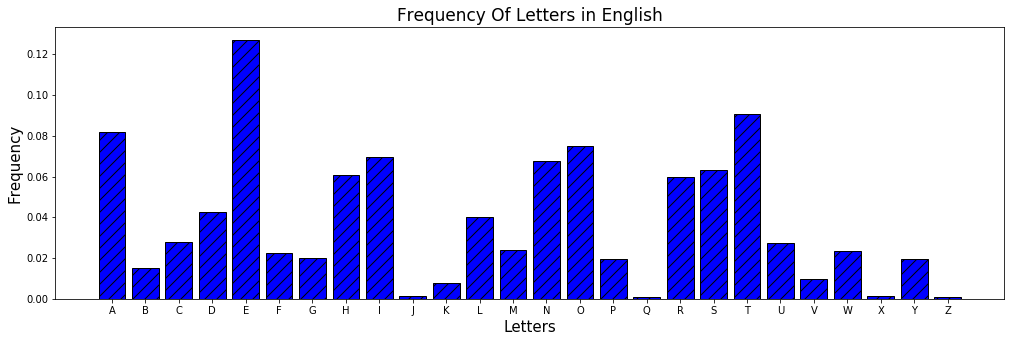

In [10]:
display_bar_plot("Frequency Of Letters in English",english_freq,'blue')

We may order the letters by their frequencies, starting from those letters that are most common to the least common. 

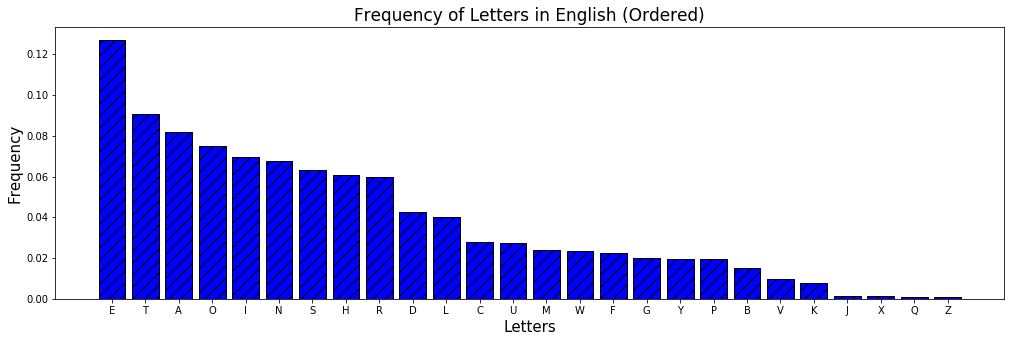

In [11]:
display_bar_plot("Frequency of Letters in English (Ordered)", order_dict(english_freq),'blue')

We find that 'E' occurs most frequently, appearing over 12% of the time, with the next most common being 'T' at around 9% the time. The frequency of each letter is given as a table below.

In [12]:
english_freq_for_table = english_freq.copy()
display_letter_count(freq_as_percent(english_freq_for_table),'Letters (%)')

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z
Letters (%),8.17,1.49,2.78,4.25,12.70,2.23,2.02,6.09,6.97,0.15,0.77,4.03,2.41,6.75,7.51,1.93,0.10,5.99,6.33,9.06,2.76,0.98,2.36,0.15,1.97,0.07


Suppose we encountered the encrypted message:

```
TIPGKFXIRGYP FI TIPGKFCFXP ZJ KYV GIRTKZTV REU JKLUP FW KVTYEZHLVJ WFI JVTLIV TFDDLEZTRKZFE ZE KYV GIVJVETV FW KYZIU GRIKZVJ TRCCVU RUMVIJRIZVJ.[2] DFIV XVEVIRCCP, TIPGKFXIRGYP ZJ RSFLK TFEJKILTKZEX REU RERCPQZEX GIFKFTFCJ KYRK GIVMVEK KYZIU GRIKZVJ FI KYV GLSCZT WIFD IVRUZEX GIZMRKV DVJJRXVJ;[3] MRIZFLJ RJGVTKJ ZE ZEWFIDRKZFE JVTLIZKP JLTY RJ URKR TFEWZUVEKZRCZKP, URKR ZEKVXIZKP, RLKYVEKZTRKZFE, REU EFE-IVGLUZRKZFE[4] RIV TVEKIRC KF DFUVIE TIPGKFXIRGYP. DFUVIE TIPGKFXIRGYP VOZJKJ RK KYV ZEKVIJVTKZFE FW KYV UZJTZGCZEVJ FW DRKYVDRKZTJ, TFDGLKVI JTZVETV, VCVTKIZTRC VEXZEVVIZEX, TFDDLEZTRKZFE JTZVETV, REU GYPJZTJ. RGGCZTRKZFEJ FW TIPGKFXIRGYP ZETCLUV VCVTKIFEZT TFDDVITV, TYZG-SRJVU GRPDVEK TRIUJ, UZXZKRC TLIIVETZVJ, TFDGLKVI GRJJNFIUJ, REU DZCZKRIP TFDDLEZTRKZFEJ.

```

A frequency analysis plot of this message shows the frequency of each letter as follows:

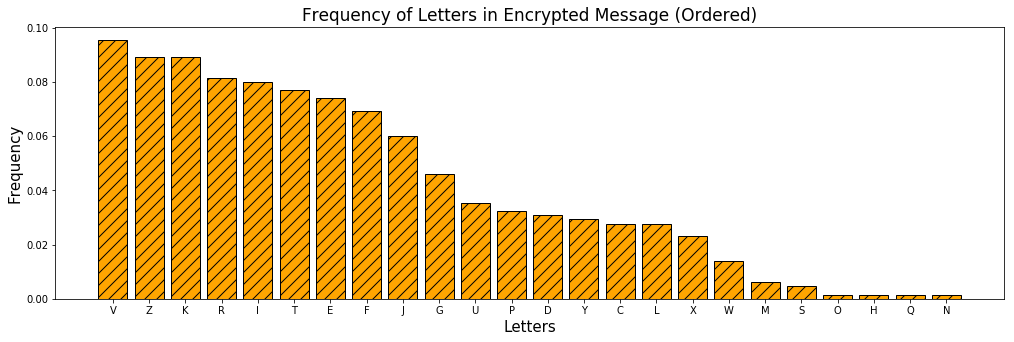

In [13]:
encrypted_string = 'tipgkfxirgyp fi tipgkfcfxp zj kyv girtkztv reu jklup fw kvtyezhlvj wfi jvtliv tfddleztrkzfe ze kyv givjvetv fw kyziu grikzvj trccvu rumvijrizvj.[2] dfiv xvevirccp, tipgkfxirgyp zj rsflk tfejkiltkzex reu rercpqzex gifkftfcj kyrk givmvek kyziu grikzvj fi kyv glsczt wifd ivruzex gizmrkv dvjjrxvj;[3] mrizflj rjgvtkj ze zewfidrkzfe jvtlizkp jlty rj urkr tfewzuvekzrczkp, urkr zekvxizkp, rlkyvekztrkzfe, reu efe-ivgluzrkzfe[4] riv tvekirc kf dfuvie tipgkfxirgyp. dfuvie tipgkfxirgyp vozjkj rk kyv zekvijvtkzfe fw kyv uzjtzgczevj fw drkyvdrkztj, tfdglkvi jtzvetv, vcvtkiztrc vexzevvizex, tfddleztrkzfe jtzvetv, reu gypjztj. rggcztrkzfej fw tipgkfxirgyp zetcluv vcvtkifezt tfddvitv, tyzg-srjvu grpdvek triuj, uzxzkrc tliivetzvj, tfdglkvi grjjnfiuj, reu dzczkrip tfddleztrkzfej.'

string_dict = text_dict(encrypted_string)
freq_dict = find_freq(string_dict)

display_bar_plot("Frequency of Letters in Encrypted Message (Ordered)", order_dict(freq_dict),'orange')

In this encrypted message, we see that the most common letter is 'V'. We can guess that 'V' was used to encrypt 'E'. But we must be cautious - not every text has exactly the same frequency. 'V' could possibly be 'T','A', or 'O', as these characters have high frequencies as well. 

We can compare the frequency of letters in the encrypted message with the usual frequency of letters in English by stacking the bar plots together. Again, we caution that this plot may not represent the exact substitutions used, but it goes to show that in our encrypted text that uses a substitution cipher, it obeys the usual frequency of letters.

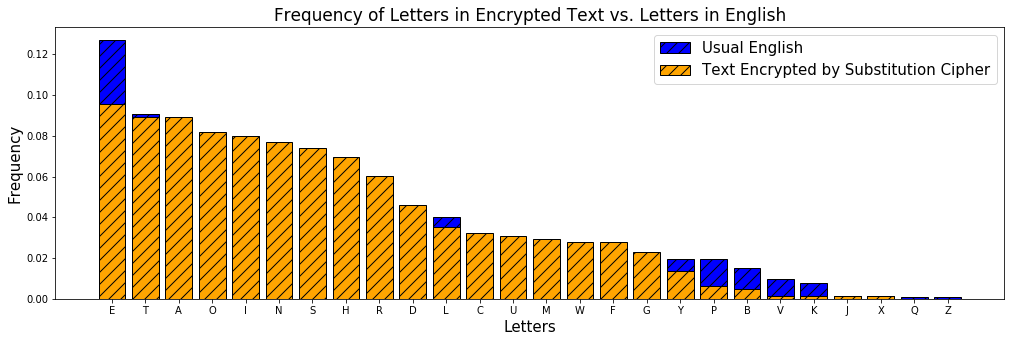

In [14]:
stacked_barplots("Frequency of Letters in Encrypted Text vs. Letters in English",order_dict(english_freq),order_dict(freq_dict),'blue','orange')

If we proceed with replacing the letters ordered from the most frequent to the least frequent from the encrypted text to their usual frequency in the English language, we may get the incorrect message if it is not the case that the frequency of letters from our encrypted text does not follow the same order. 

In using frequency analysis, we may need to consider some other patterns in the language. For instance, in English, the only single lettered words are 'A' and 'I'. So we may start by assuming that every time we encounter a single letter in the encrypted message, they are likely to be 'A' or 'I'. Some other common word that appear is 'THE', so whenever we encounter a three letter word, it is reasonable to substitute the order of their letters with the order of letters in 'THE'. 

In the encrypted message, we have the three lettered word 'KYV', we can assume that 'K' is 'T', 'Y' is 'H', and 'V' is 'E' (and we have even more reason to confirm this, since 'V' is the most common letter in the encrypted text).

Going in the manner of considering the statistics of how common certain English words are used, we are able to decrypt the entire text. In fact, it is encrypted using the Caesar cipher with a shift of 19, which we my have tested by counting how many letters it takes to shift 'E' to 'V'. We also notice that the order frequency of letters in the encrypted text does not follow exactly the same order as that in the English language (but it is close to matching the usual frequency).

The decrypted message is:
```
'CRYPTOGRAPHY OR CRYPTOLOGY IS THE PRACTICE AND STUDY OF TECHNIQUES FOR SECURE COMMUNICATION IN THE PRESENCE OF THIRD PARTIES CALLED ADVERSARIES.[2] MORE GENERALLY, CRYPTOGRAPHY IS ABOUT CONSTRUCTING AND ANALYZING PROTOCOLS THAT PREVENT THIRD PARTIES OR THE PUBLIC FROM READING PRIVATE MESSAGES;[3] VARIOUS ASPECTS IN INFORMATION SECURITY SUCH AS DATA CONFIDENTIALITY, DATA INTEGRITY, AUTHENTICATION, AND NON-REPUDIATION[4] ARE CENTRAL TO MODERN CRYPTOGRAPHY. MODERN CRYPTOGRAPHY EXISTS AT THE INTERSECTION OF THE DISCIPLINES OF MATHEMATICS, COMPUTER SCIENCE, ELECTRICAL ENGINEERING, COMMUNICATION SCIENCE, AND PHYSICS. APPLICATIONS OF CRYPTOGRAPHY INCLUDE ELECTRONIC COMMERCE, CHIP-BASED PAYMENT CARDS, DIGITAL CURRENCIES, COMPUTER PASSWORDS, AND MILITARY COMMUNICATIONS.'
```

----

### Try It Yourself!

In the following content, you will have a chance to apply frequency analysis. Take a text of your choice (preferably at least two or three paragraphs long) and pick a shift to encrypt it using the Caesar cipher. We will observe how we may be able to guess the shift by comparing it to the usual frequency of letters in the English language.

In [15]:
get_user_text

Textarea(value='', layout=Layout(height='250px', width='100%'), placeholder='Enter your text here.')

In [16]:
button_t = w.Button(button_style='info',description="Apply Frequency Analysis", layout=Layout(width='100%', height='50px') )
button_t.on_click(rerun_cell)
display(button_t)

Button(button_style='info', description='Apply Frequency Analysis', layout=Layout(height='50px', width='100%'), style=ButtonStyle())

In [17]:
def shift_bars(Shift):

    user_string = get_user_text.value
    encrypted_user_string = encrypt(Shift,user_string)
    encrypted_user_dict = fill_zeroes( text_dict(encrypted_user_string) )
    encrypted_user_freq = find_freq(encrypted_user_dict)
    enc_ordered_user_dict = collections.OrderedDict(sorted(encrypted_user_freq.items())) 

    double_bars_plot(english_freq,enc_ordered_user_dict)
    
if(get_user_text.value == ''):
    
    display(Markdown("# Please enter a text in the text block above to apply a frequency analysis.") )
    
else:
    
    interact(shift_bars,Shift=(0,25));

# Please enter a text in the text block above to apply a frequency analysis.

----

### Decryption Exercise Using Frequency Analysis

Use your knowledge learned from frequency analysis to decrypt the following message:

In [18]:
# Function: create a button for each letter from A to Z that allows user to pick one
# Input: label for user prompt, string
# Output: widget of buttons from A to Z

def create_letters_widget(label):
    
    return widgets.ToggleButtons(options= list(string.ascii_uppercase),
                                 description=label, 
                                 disabled=False,
                                 button_width='20%',
                                 style={'button_width':'25px'})

# Function: gets the user's choice of letter for each tab
# Input: list of tabs (children list of accordion, i.e. my_accordion.children) 
# Output: list of values corresponding to each tab

def get_substitution_values(tab_childrens):
    
    output_values_list = []
    
    for child in tab_childrens:
        
        output_values_list.append(child.value)
        
    return output_values_list

# Function: set the ciphertext
# Input: keyword to derange the alphabet
# Output: ciphertext alphabet

def set_ciphertext(keyword):
    
    # Error handling: 
    
    # 1. Check if keyword is too long. Limit to 26 words at most.
    
    # 2. Check if every character in the keyword is an alphabet. 
    
    keyword = keyword.upper()
    ciphertext_alphabet = list(string.ascii_uppercase)
    
    # 1. Remove letters in keyword from ciphertext alphabet list

    for i in range(len(keyword)):
        
        current_character = keyword[i]
        
        if(current_character in ciphertext_alphabet):
            
            index_to_remove = ciphertext_alphabet.index(current_character)
            del ciphertext_alphabet[index_to_remove]
            
    # 2. Add the keyword letters in front of ciphertext alphabet list
    
    keyword = keyword[::-1]
    
    for current_character in keyword:
        
        ciphertext_alphabet.insert(0,current_character)
        
    return ciphertext_alphabet

def letter_substitutions(message,in_alphabet,out_alphabet):
    
    # print("In tab:  ", in_alphabet)
    # print("Out tab: ", out_alphabet)
    
    message = message.upper()
    character_substitutions = str.maketrans(in_alphabet,out_alphabet)
    message_translation = message.translate(character_substitutions)
    
    return message_translation

def rerun_cell(ev):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+2)'))
    button_t = w.Button(button_style='info',description="Restart")

In [19]:
# Making the tabs

widget_list = []
uppercase_letters_list = list(string.ascii_uppercase)

# 1. Fill the widget list with desired widgets (each tab will be a children of our accordion)

for i in range(len(uppercase_letters_list)):
    
    current_widget = create_letters_widget('Substitution')
    current_widget.value = uppercase_letters_list[i]
    widget_list.append(current_widget)


# 2. Create the accordion, label each tab & fill each tab with widgets 

children_list = widget_list
letters_tab = widgets.Tab()
letters_tab.children = children_list

for i in range(len(children_list)):
    
    letters_tab.set_title(i, uppercase_letters_list[i])

letters_tab

Tab(children=(ToggleButtons(description='Substitution', options=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'), style=ToggleButtonsStyle(button_width='25px'), value='A'), ToggleButtons(description='Substitution', index=1, options=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'), style=ToggleButtonsStyle(button_width='25px'), value='B'), ToggleButtons(description='Substitution', index=2, options=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'), style=ToggleButtonsStyle(button_width='25px'), value='C'), ToggleButtons(description='Substitution', index=3, options=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'), style=ToggleButtonsStyle(button_width='25px'), value='D'), ToggleButtons(description='Substitution', index=4, options=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'), style=ToggleButtonsStyle(button_width='25px'), value='E'), ToggleButtons(description='Substitution', index=5, options=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'), style=ToggleButtonsStyle(button_width='25px'), value='F'), ToggleButtons(description='Substitution', index=6, options=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'), style=ToggleButtonsStyle(button_width='25px'), value='G'), ToggleButtons(description='Substitution', index=7, options=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'), style=ToggleButtonsStyle(button_width='25px'), value='H'), ToggleButtons(description='Substitution', index=8, options=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'), style=ToggleButtonsStyle(button_width='25px'), value='I'), ToggleButtons(description='Substitution', index=9, options=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'), style=ToggleButtonsStyle(button_width='25px'), value='J'), ToggleButtons(description='Substitution', index=10, options=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'), style=ToggleButtonsStyle(button_width='25px'), value='K'), ToggleButtons(description='Substitution', index=11, options=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'), style=ToggleButtonsStyle(button_width='25px'), value='L'), ToggleButtons(description='Substitution', index=12, options=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'), style=ToggleButtonsStyle(button_width='25px'), value='M'), ToggleButtons(description='Substitution', index=13, options=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'), style=ToggleButtonsStyle(button_width='25px'), value='N'), ToggleButtons(description='Substitution', index=14, options=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'), style=ToggleButtonsStyle(button_width='25px'), value='O'), ToggleButtons(description='Substitution', index=15, options=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'), style=ToggleButtonsStyle(button_width='25px'), v

In [20]:
# Apply substitutions in previous cell to ciphertext in the next cell 

button_t = widgets.Button(button_style='info',description="Apply Substitutions", layout=Layout(width='100%', height='50px') )
button_t.on_click(rerun_cell)
display(button_t)

Button(button_style='info', description='Apply Substitutions', layout=Layout(height='50px', width='100%'), style=ButtonStyle())

In [21]:
# Set the message and choose a keyword for encyrption

key = 'OCEAN'
message = 'I ATE THE CHOCOLATE CAKE. IT WAS VERY DELICIOUS. I WOULD EAT IT AGAIN.'
ciphertext_values = set_ciphertext(key)

# Encrypt message

in_alphabet = string.ascii_uppercase
out_alphabet = ''.join(set_ciphertext(key))
encrypted_message = letter_substitutions(message,in_alphabet,out_alphabet)

# Display & update the user's choice of alphabets

current_alphabet = ''.join(get_substitution_values(letters_tab.children))
updated_message = letter_substitutions(encrypted_message, in_alphabet, current_alphabet)
display(Markdown("# Updated message with your substitutions:"))
display(Markdown(updated_message))

# Display message to be decoded

display(Markdown("# Message to decode: "))
display(Markdown("G OTN TFN EFMEMJOTN EOIN. GT WOS VNRY ANJGEGMUS. G WMUJA NOT GT ODOGL."))

# Check if the user has successfully decrypted the message

print("\n")
if (updated_message == message):
    display("The user has sucessfully decrypted the message")

# Updated message with your substitutions:

G OTN TFN EFMEMJOTN EOIN. GT WOS VNRY ANJGEGMUS. G WMUJA NOT GT ODOGL.

# Message to decode: 

G OTN TFN EFMEMJOTN EOIN. GT WOS VNRY ANJGEGMUS. G WMUJA NOT GT ODOGL.

In [22]:
from IPython.display import display
button = w.Button(button_style='info',description="View Decoded Message", layout=Layout(width='20%', height='30px'))
display(button)

def on_button_clicked(b):
    
    display(Markdown("# Plain text message: "))
    display(Markdown("### I ATE THE CHOCOLATE CAKE. IT WAS VERY DELICIOUS. I WOULD EAT IT AGAIN."))
    b.close()

button.on_click(on_button_clicked)

Button(button_style='info', description='View Decoded Message', layout=Layout(height='30px', width='20%'), style=ButtonStyle())

---

<h1 align='center'>Applications of Cryptography: Historical</h1>

### The Development of Cipher Machines

After World War I, codebreakers maintained the upper hand over the code makers. After the war, there was an effort to find better encryption systems. Cryptographers looked at incorporating technology in order to mechanize secrecy.

Invented in the 15th century by an Italian architect Leon Alberti was the earliest cryptographic machine, called the cipher disk. It can encrypt a message with a simple Caesar shift, or in a more complicated way using a keyword, but as we previously explored, these methods of encryption have serious weaknesses. They could be decrypted by brute force or by frequency analysis.

<img src="./images/cipherdisk.png" alt="Drawing" style="width: 300px;"/>

In 1918, German inventors Arthur Scherbius and Richard Ritter founded the company Scherbius & Ritter, an engineering firm that worked with many mechanical objects from turbines to heated pillows. One of their pet projects was to replace inadequate systems of cryptography used in World War I. Their resulting solution would be called Enigma (pictured below). This cipher machine would become the most feared system of encryption in history.

<img src="./images/enigma.jpg" alt="Drawing" style="height: 400px" style="width: 300px;"/>

### The Enigma Machine

Scherbius' Enigma machine was made of several ingenious components. These components form an intricate cipher machine. We will look at a simplified and basic version of Scherbius' machine. 

The basic form consists of three elements, each connected by wires:

* **Keyboard:** which receives plain text inputs
* **Scrambling unit:** encrypts each plain text letter into a cipher text letter
* **Display board:** consists of various lamps that indicates the cipher text letter

The scrambler is the most important part of the Enigma. The internal wirings of the scrambler determines the encryption. A plain text letter is entered on the keyboard, then the scrambler makes a series of twists and turns to yield the cipher text letter. The diagram below shows a simplified version of how the Enigma works for a keyboard with six letters. (Keep in mind that the original Enigma had 26 letters.) Everytime a letter input is received, the scrambler rotates by one place, which changes how each letter is encrypted, so the encryption for typing in the same letter six times in a row is constantly changing!

<img src="./images/scramblers.png" alt="Drawing" style="width: 400px;"/>

### The Scramblers & Reflector

With the scrambler, typing the same letter enough times will repeat the pattern of the encryption. In general, cryptographers want to avoid repetition because it leads to regularity of a cipher text. With the Enigma machine, there would be three scramblers, and the advantage of adding additional scramblers is that the pattern of encryption is not repeated until all the scramblers are back to their original position. For instance, the advantage of adding the second scrambler is that the first scrambler first needs to do twenty-six complete revolutions until returning to its original position. With three scramblers, each of which set in one of 26 orientations, we already have $26\times 26 \times 26 = 17,576$ settings!

Scherbius increased security by allowing the scramblers to be removable and interchangeable, and the arrangement of scramblers affects the encryption. With three scramblers, there are six different ways to arrange them, and this increased the possible initial settings by a factor of six.

Another feature is the reflector, which receives the incoming signal and sends it back to the three scramblers in a different route. Its static nature does not add to the number of cipher alphabets, however, its usage would be visible when it comes to encrypting and decrypting messages.

<img src="./images/scramblersreflectors.png" alt="Drawing" style="width: 400px;"/>

### The Plugboards

Another feature of the Enigma machine is the plugboard between the keyboard and the scramblers. The plugboard allows for the sender to insert cables, which swaps the letters before they enter the scrambler. The Enigma operator would have six cables, which means that six pairs of letters can be swapped, leaving fourteen that are unplugged and unswapped. The number of ways of connecting six pairs of letters out of 26 is 100,391,791,500.

### Total Keys

The total number of keys is the product of the three numbers determined by the scrambler orientations, scrambler arrangements, and the plugboard connections. In total, we have:

$$17,576 \times  6 \times 100,391,791,500 \approx 10,000,000,000,000,000$$

That is, there are about 10 quadrillion possible keys to set up the Enigma, and an interceptor would have to check every single one of them in order to crack the cipher text. To put this into perspective, a group of cryptanalysts capable of checking one setting every minute would take longer than the age of the universe to check every setting!

### Cracking the Enigma

During World War II, the Germans made improvements to the Enigma machine by increasing the number of plugboards to ten, increasing the number of possible keys to $159,000,000,000,000,000,000$ ($159$ sextillion).

In 1926, British cryptanalysts continued monitoring German communications, and their ability to gather intelligence diminished quickly. Even with the help of Americans and the French, the Enigma cipher was beyond their decrypting abilities. During this time, Germany had the most secure communication the world had ever seen.

If the British could decrypt the Germans' messages, then they would be able to pick up news of imminent attacks and send reinforcements or take evasive actions. For thirteen years, the Americans, the British, and the French assumed that the Enigma was unbreakable, and it was only after this much time that they found hope. With the help of the knowledge of Polish cryptanalysts attempting to break the Enigma, the Code and Cypher School was started in Bletchley Park. This codebreaking organization would eventually be joined by Alan Turing (pictured below) who would eventually pave the way for breaking the Enigma machine.

It was with Turing's observations with the accumulation of Bletchley Park's library of decrypted messages from the Enigma machine that he noticed a rigid structure. For instance, his experience revealed that at certain times of the day, the Germans sent weather reports, and would almost certainly contain the word WETTER, the German word for weather. This would be known as a crib. Turing used this knowledge to separate the problem of finding scrambler settings to that of finding the plugboard settings. If he could find something in the crib, then he could reduce the number of scrambler combinations that needs to be checked, and eventually deduce the plugboard cabling. With this strategy in mind, along with the help of prototype computers (called the Bombe), would present to be a vital breakthrough in breaking the Enigma. Once the plugboard cabling and scrambler settings had been established for a particular message, the day key was deduced, and all the other messages from the same day would be deciphered. 

It has been estimated that this work at Bletchley shortened the war by more than two years and prevented the death of fourteen million lives.

<img src="./images/alanturing.png" alt="Drawing" style="width: 400px;"/>

---
<h1 align='center'>Applications of Cryptography: Modern</h1>

## RSA

It was in 1977 that a group of mathematicians and computer scientists named Rivest, Shamir, and Adleman (in the picture below) mulled over a question that was troubling cryptanalysts: is it possible to build an asymmetric cipher? That is, can there be a cipher that can only be reversed by the receiver only if the receiver has some special information?

<img src="./images/rsa.png" alt="Drawing" style="width: 400px;"/>

## Asymmetric Cipher

To demonstrate the goal and procedures for an asymmetric cipher, we create fictional characters Alice and Bob who want to exchange messages and Eve, the eavesdropper (a passive attacker).

What cryptanalysts and scientists were looking for was as follows:

* Can Alice create a public key that she could publish so that Bob can use it to encrypt messages for her but impossible for anybody else to reverse and decrypt her messages?

* At the same time, Alice needs to be able to decrypt messages being sent to her, so she must have a private key (the special piece of information) that allows her to reverse the public key, so that Alice (and only Alice alone) can decrypt messages sent to her.

What they were searching for was a mathematical function that achieves the properties above. The work of Rivest, Shamir, and Adleman describes such a method, based on  a one way function described mathematically. We look at one particular aspect of the RSA, and this aspect is the number $N$, which allows for a one-way function reversible only if the decoder has the public key.

It is beyond the extent of this notebook to discuss how this $N$ value is processed by a computer in converting numbers into letters and so on, but we will explore as to how this one-way function works.

## Public-key Cryptography

The asymmetry begins with Alice choosing $N$, a personalized one-way function, this she does by choosing two prime numbers $p$ and $q$, and multiplies them together. So 

$$N=p \times q.$$

Recall that a prime number is number with no divisors other than itself or $1$ (for example, $13$ is prime, since no number but $1$ or $13$ can divide $13$, however, $12$ is not prime, since it is divisible by numbers like $2$, $3$, $4$, or $6$).

If Alice chooses $p=17,159$ and $q=10,247$, then she gets:

$$N=p \times q = 17,159 \times 10,247 = 175,828,273.$$

This $N$ value become Alice's public encryption key. It does not matter if this is visible to others. At this point, this message is very secure, since nobody can find $p$ and $q$ to decipher the message, so only Alice can decipher the message. We can think of $N$ as the **public key**, where as the values $p$ and $q$ are the **private keys**.

We might think that just because everybody knows $N$, it would be easy to find $p$ and $q$ to read Alice's messages. But this is not the case when $N$ is really large. The fundamental aspect of the RSA cipher is that it is easy to make $N$, but very hard to find $p$ and $q$ from $N$, this is what makes it a one-way function.

For instance, if we were given $p=17,159$ and $q=10,247$ as before, it does not take a lot of effort for a calculator to calculate $N=175,828,273$. But now, think about it in reverse, suppose you were given $N=175,828,273$ without the knowledge of what $p$ and $q$ is. How can you determine $p$ and $q$ from $N$?

This system of asymmetry in cryptography is a form of **public-key cryptography**. For really secured messages, one would choose really large values for $p$ and $q$, for instance, a value larger than $10^{65}$, which would result in an $N$ value that is as large as $10^{130}$. A computer would calculate $N$ quickly, but if Eve wanted to get $p$ and $q$, it would take her way longer. For instance, banking transactions today use $N$ values with key sizes as large as $2^{4096}\approx 10^{1477}$. 

It is now routine to encrypt a message with $N$ values so large, that all the computers on the planet would take longer than the age of the universe to break the cipher!

## Conclusion

The strength of the RSA is tied to a fundamentally difficult mathematical problem, that of factoring. For over two thousand years, mathematicians have failed to find a shortcut of finding the prime factors of large composite numbers. For most mathematicians, factoring is an inherently difficult problem that will remain to be unsolved for decades to come. If this assumption is true, then RSA remains to be one of the most secure ways in transmitting messages.

---

#### Picture Sources:

The sources of pictures (ordered by appearance in the notebook from top to bottom) are listed below:

[1] Clockface picture: Simon Singh's _The Code Book_, Delacorte Press, Figure 47, page 199.

[2] Caesar: [Twitter Profile Picture by Julius Caesar](https://twitter.com/julius_caesar)

[3] Cipher Disk: Simon Singh's _The Code Book_, Delacorte Press, Figure 25, page 104.

[4] Enigma Machine: [Photo by The Mirror](https://www.google.com/search?q=enigma+machine&client=firefox-b-ab&tbm=isch&tbs=rimg:CcZRVZMZSzIrIjg6_1PuIxXt4TKi6NA3zFQiXjE01ms6ngQrlYYovyq-3V0hXeT_1If92OvobQUYDjkl2DWnZk2oB-XSoSCTr8-4jFe3hMEVxPW0m07KlMKhIJqLo0DfMVCJcRfuZy8NK_1AZ0qEgmMTTWazqeBChEcmol4QzMSVSoSCeVhii_1Kr7dXETdsRuy8eLupKhIJSFd5P8h_13Y4R-EcvmQDohYIqEgm-htBRgOOSXRHUmfO75hK0zioSCYNadmTagH5dEY5nSyPv78OJ&tbo=u&sa=X&ved=2ahUKEwiYrvrs5dbbAhVTCTQIHfrRCYoQ9C96BAgBEBs&biw=1233&bih=678&dpr=1#imgrc=jE01ms6ngQr3eM)

[5] Scrambler Rotations Diagram: Simon Singh's _The Code Book_, Delacorte Press, Figure 27, page 107.

[6] Keyboard, Lampboard, Scrambler, Reflector Diagram: Simon Singh's The Code Book, Delacorte Press, Figure 29, page 111.

[7] Alan Turing: [Photo by ZME Science](https://www.google.com/search?q=alan+turing&client=firefox-b-ab&source=lnms&tbm=isch&sa=X&ved=0ahUKEwjvpI_I5tbbAhWCKn0KHd5eDjAQ_AUICigB&biw=1233&bih=678#imgrc=UgK_uWaBZhjsIM)

[8] RSA creators: Simon Singh's _The Code Book_, Delacorte Press, Figure 48, page 204.